In [1]:
%cd ../

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import re

import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

In [3]:
%matplotlib inline

In [4]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [5]:
mask_file = '/data/datasets/siskind/fmri-datasets/hollywood-mashup/processed/experiments/subject-01/full-mask.nii.gz'
hollywood_mashup_db = niidb.FMriActivationsDb('data/hollywood_mashup.db')

In [6]:
dtfa = DTFA.DeepTFA(hollywood_mashup_db.all(), mask=mask_file, num_factors=100, embedding_dim=2, model_time_series=False)

08/08/2019 12:04:43 Loading Nifti image /data/datasets/siskind/fmri-datasets/hollywood-mashup/processed/experiments/subject-01/subject-01_run-01.nii.gz with mask /data/datasets/siskind/fmri-datasets/hollywood-mashup/processed/experiments/subject-01/full-mask.nii.gz (zscore=False, smooth=6)
08/08/2019 12:04:44 Loading Nifti image /data/datasets/siskind/fmri-datasets/hollywood-mashup/processed/experiments/subject-01/subject-01_run-02.nii.gz with mask /data/datasets/siskind/fmri-datasets/hollywood-mashup/processed/experiments/subject-01/full-mask.nii.gz (zscore=False, smooth=6)
08/08/2019 12:04:45 Loading Nifti image /data/datasets/siskind/fmri-datasets/hollywood-mashup/processed/experiments/subject-01/subject-01_run-03.nii.gz with mask /data/datasets/siskind/fmri-datasets/hollywood-mashup/processed/experiments/subject-01/full-mask.nii.gz (zscore=False, smooth=6)
08/08/2019 12:04:45 Loading Nifti image /data/datasets/siskind/fmri-datasets/hollywood-mashup/processed/experiments/subject-01/

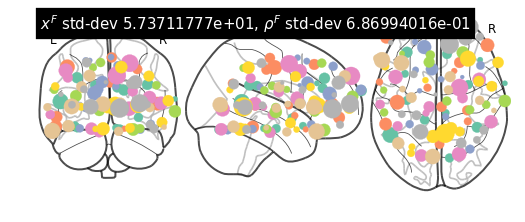

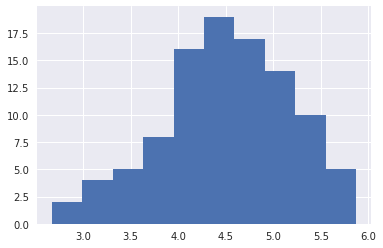

(<nilearn.plotting.displays.OrthoProjector at 0x7fdd22639ba8>,
 tensor([[  8.0688, -25.4466, -19.1412],
         [-32.7665,  38.2466,  33.5180],
         [-14.2070, -32.8178,  25.7315],
         [ 44.2346,  30.2907,  28.1849],
         [-50.2727, -48.7358,   8.6627],
         [ 41.0288, -40.6599,  26.2414],
         [ 31.7087,   4.2390,  -8.2588],
         [ 16.4289,  76.8559,  20.4730],
         [-34.9224,  15.6139, -16.5326],
         [-32.7599, -12.4955, -19.3104],
         [ 11.9663, -72.9124, -20.3739],
         [  9.3853,  36.3444,  23.1173],
         [ 70.2497,   5.6088,  11.2078],
         [ 22.5407,  27.4543,  48.0708],
         [ 51.9093,  45.6984,   6.1811],
         [-43.0496, -14.3168,  44.8869],
         [-54.5710,  53.6197,  -7.7781],
         [  1.4913, -58.4056,  28.0753],
         [  3.5642, -19.1409,  54.8289],
         [ 31.2152, -34.4366,   3.5781],
         [-55.2181, -37.2653, -17.8155],
         [-11.1337,   0.9570,   4.9762],
         [ 30.5187, -22.8973,  42.4

In [7]:
dtfa.visualize_factor_embedding()

In [8]:
losses = dtfa.train(num_steps=1000, learning_rate={'q': 1e-2, 'p': 1e-4}, log_level=logging.INFO, num_particles=1,
                    batch_size=1, use_cuda=True, checkpoint_steps=100, blocks_batch_size=60, patience=100)

08/08/2019 12:06:55 [Epoch 1] (60532ms) Posterior free-energy 1.53974560e+08 = KL from prior 1.97868362e+06 - log-likelihood -1.51995872e+08
08/08/2019 12:06:55 Saving checkpoint...
08/08/2019 12:07:54 [Epoch 2] (58976ms) Posterior free-energy 1.48985744e+08 = KL from prior 1.86512338e+06 - log-likelihood -1.47120592e+08
08/08/2019 12:08:52 [Epoch 3] (57686ms) Posterior free-energy 1.47257408e+08 = KL from prior 1.79585600e+06 - log-likelihood -1.45461520e+08
08/08/2019 12:09:49 [Epoch 4] (57165ms) Posterior free-energy 1.46395872e+08 = KL from prior 1.73021800e+06 - log-likelihood -1.44665664e+08
08/08/2019 12:10:46 [Epoch 5] (57190ms) Posterior free-energy 1.45863408e+08 = KL from prior 1.64866175e+06 - log-likelihood -1.44214768e+08
08/08/2019 12:11:44 [Epoch 6] (57542ms) Posterior free-energy 1.45445232e+08 = KL from prior 1.54485638e+06 - log-likelihood -1.43900400e+08
08/08/2019 12:12:42 [Epoch 7] (57495ms) Posterior free-energy 1.45094960e+08 = KL from prior 1.42152375e+06 - log

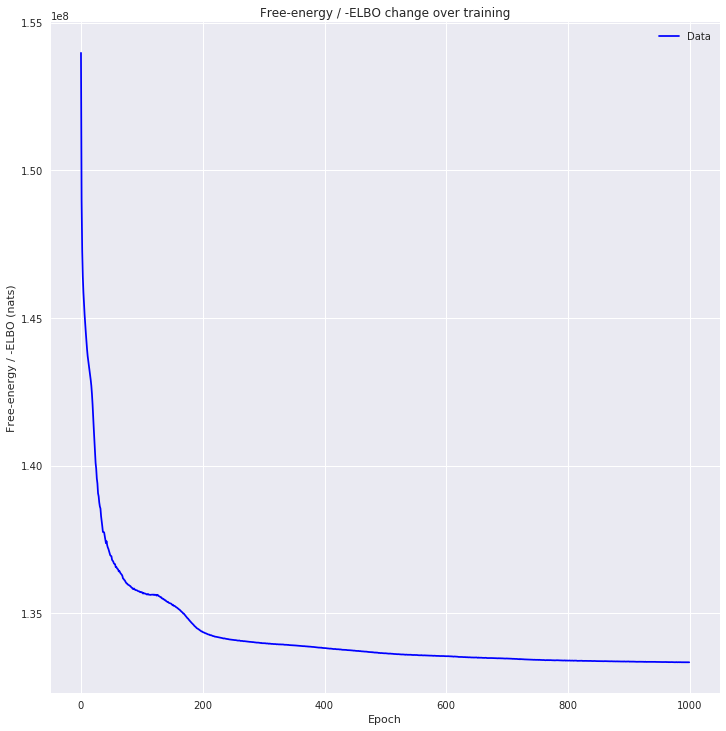

In [9]:
utils.plot_losses(losses)

In [10]:
def hollywood_mashup_labeler(block):
    subject = str(block.subject)
    task = block.task
    return 'Subject ' + subject + ', ' + task + ' stimulus'

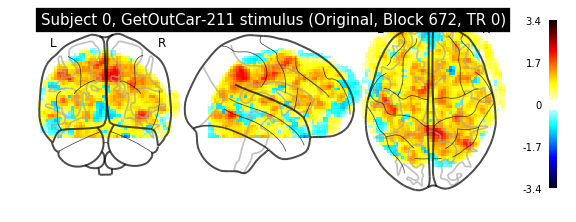

08/09/2019 04:11:34 Reconstruction Error (Frobenius Norm): 8.95758820e+01 out of 1.10215141e+02


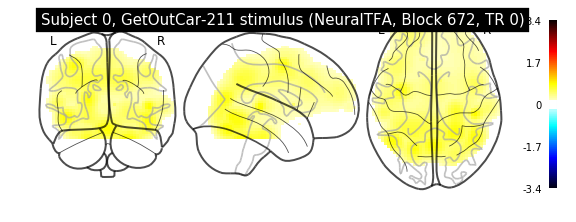

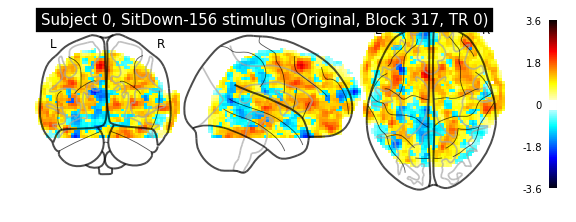

08/09/2019 04:11:36 Reconstruction Error (Frobenius Norm): 1.11205269e+02 out of 1.18239891e+02


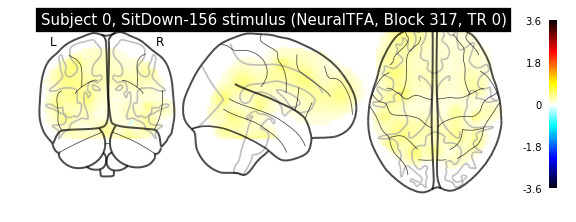

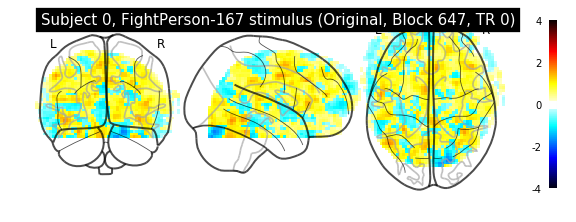

08/09/2019 04:11:38 Reconstruction Error (Frobenius Norm): 8.14597397e+01 out of 8.89458389e+01


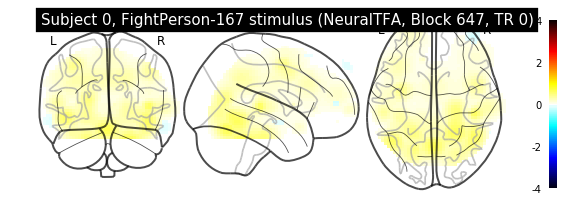

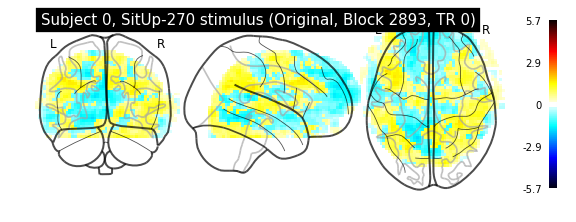

08/09/2019 04:11:41 Reconstruction Error (Frobenius Norm): 9.23972473e+01 out of 9.80662766e+01


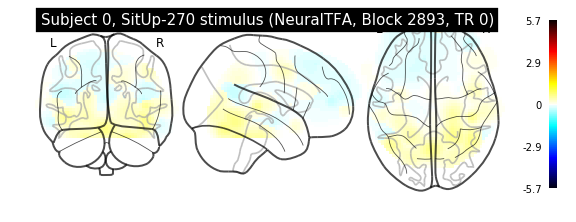

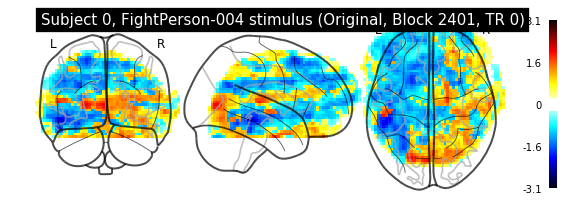

08/09/2019 04:11:43 Reconstruction Error (Frobenius Norm): 1.01332695e+02 out of 1.15288841e+02


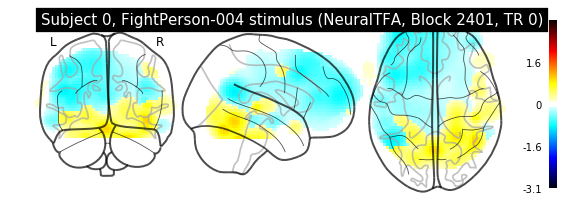

In [11]:
for b in np.random.choice(range(dtfa.num_blocks), 5):
    dtfa.plot_original_brain(b, labeler=hollywood_mashup_labeler)
    dtfa.plot_reconstruction(b, labeler=hollywood_mashup_labeler)

In [19]:
def task_labeler(task):
    return task.partition('-')[0]

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


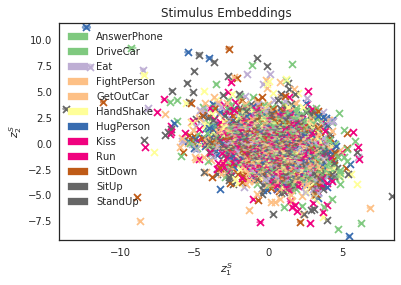

In [20]:
dtfa.scatter_task_embedding(labeler=task_labeler, figsize=None)

In [14]:
def subject_labeler(subject):
    return 'Subject %d' % subject

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


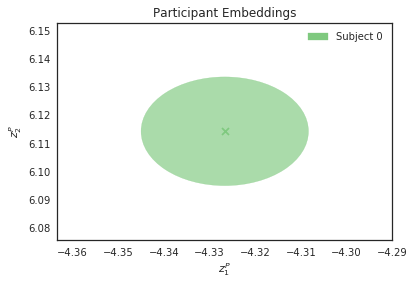

In [15]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, figsize=None)

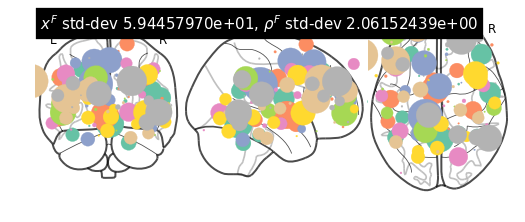

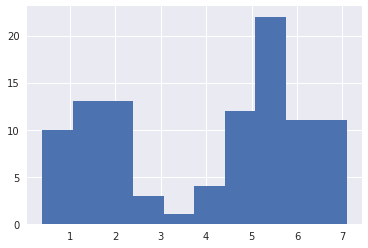

(<nilearn.plotting.displays.OrthoProjector at 0x7fdd090d8f98>,
 tensor([[ 21.3997, -47.2015, -34.7963],
         [-28.3563,  36.5378,  41.7444],
         [-18.7654, -19.0682,  25.3459],
         [ 45.4932,  36.0918,  19.4396],
         [-44.8564, -51.3502,  20.2822],
         [ 41.0838, -49.9331,  25.1568],
         [ 21.6783,   4.7661, -10.7466],
         [ 17.9752,  85.3646,   8.9987],
         [-19.9604,  13.3694, -17.1608],
         [-37.6481, -30.4095, -26.4397],
         [  1.8185, -52.2321, -14.8019],
         [  9.3220,  41.3706,  22.2778],
         [ 54.6790,  -4.4620,  12.2873],
         [ 19.7673,  19.0344,  69.2263],
         [ 56.5482,  46.0217,  11.6609],
         [-49.9890, -10.9896,  33.9129],
         [-57.2253,  57.7350, -17.6635],
         [ 11.1128, -42.3719,  22.0995],
         [ 10.3529, -13.6560,  61.3264],
         [ 21.5678, -36.5940,  13.3056],
         [-52.7870, -34.5538, -10.1262],
         [ -3.6441,  -1.4054,  -5.0702],
         [ 36.6740, -22.8160,  33.7

In [16]:
dtfa.visualize_factor_embedding()

In [17]:
dtfa.average_reconstruction_error()

08/09/2019 04:14:29 Average reconstruction error (MSE): 4.31720770e-01
08/09/2019 04:14:29 Average data norm (Euclidean): 4.98781199e-01
08/09/2019 04:14:29 Percent average reconstruction error: 0.404743


(0.4317207696942746, 0.49878119884164446, 0.0040474306460920005)

In [18]:
dtfa.average_reconstruction_error(weighted=False)

08/09/2019 04:16:27 Average reconstruction error (MSE): 9.38438774e+01 +/- 1.63038523e+01
08/09/2019 04:16:27 Average data norm (Euclidean): 1.07114003e+02 +/- 2.52306394e+01
08/09/2019 04:16:27 Percent average reconstruction error: 88.859303 +/- 8.83794237e+00


(array([95.76618958, 80.30173492, 90.1545639 , ..., 86.9595108 ,
        74.50824738, 82.31084442]),
 array([100.90693665,  82.19390106,  94.65022278, ...,  98.21504211,
         83.87232208,  93.06697845]),
 array([0.94905457, 0.97697924, 0.9525024 , ..., 0.88539911, 0.88835322,
        0.88442588]))